In [ ]:
#importing modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

### Unfiltered Data
1. Investment in Housing Overtime
2. HDI Overtime
3. Literacy in 2012
4. Numeracy in 2012

In [ ]:
#importing data
df_h_inv = pd.read_csv("https://raw.githubusercontent.com/fabf28/housing_and_education/main/3410017501_databaseLoadingData.csv")
df_hdi = pd.read_csv("https://raw.githubusercontent.com/fabf28/housing_and_education/main/GDL-Sub-national-HDI-data.csv")
df_lit_num = pd.read_csv("https://raw.githubusercontent.com/fabf28/housing_and_education/main/canadas_literacy_2012.csv")
df_mortgage = pd.read_csv("https://raw.githubusercontent.com/fabf28/housing_and_education/main/3410015901_databaseLoadingData.csv")

##Data Cleaning, Filtering, Manipulation, and Combination

###Investment in Housing Over Time and in 2012

In [ ]:
df_h_inv.keys()

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of structure', 'Type of work',
       'Investment Value', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [ ]:
df_h_inv1 = df_h_inv[["GEO", "REF_DATE", "VALUE"]]
df_h_inv1

,GEO,REF_DATE,VALUE
0,Canada,2010-01,7094532541
1,Canada,2010-02,6085675314
2,Canada,2010-03,5232280184
3,Canada,2010-04,5719816158
4,Canada,2010-05,7083345415
...,...,...,...
2137,Nunavut,2022-05,8007129
2138,Nunavut,2022-06,17301755
2139,Nunavut,2022-07,25110114
2140,Nunavut,2022-08,19354905


In [ ]:
df_h_inv1["Year"] = df_h_inv1["REF_DATE"].apply(lambda x: int(str(x).split("-")[0]))
df_h_inv1["Year2"] = df_h_inv1["REF_DATE"].apply(lambda x: int(str(x).split("-")[0]) + int(str(x).split("-")[1])/12)
df_canada_dec = df_h_inv1[df_h_inv1["GEO"] == "Canada"]
df_h_inv1

<ipython-input-210-afee8928ffd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_inv1["Year"] = df_h_inv1["REF_DATE"].apply(lambda x: int(str(x).split("-")[0]))
<ipython-input-210-afee8928ffd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_inv1["Year2"] = df_h_inv1["REF_DATE"].apply(lambda x: int(str(x).split("-")[0]) + int(str(x).split("-")[1])/12)


,GEO,REF_DATE,VALUE,Year,Year2
0,Canada,2010-01,7094532541,2010,2010.083333
1,Canada,2010-02,6085675314,2010,2010.166667
2,Canada,2010-03,5232280184,2010,2010.250000
3,Canada,2010-04,5719816158,2010,2010.333333
4,Canada,2010-05,7083345415,2010,2010.416667
...,...,...,...,...,...
2137,Nunavut,2022-05,8007129,2022,2022.416667
2138,Nunavut,2022-06,17301755,2022,2022.500000
2139,Nunavut,2022-07,25110114,2022,2022.583333
2140,Nunavut,2022-08,19354905,2022,2022.666667


In [ ]:
years2 = list(range(2010,2020))

In [ ]:
years_df2 = []
for year in years2:
  dfz = df_h_inv1[df_h_inv1["Year"] == year]

  provinces = list(dfz["GEO"].unique())

  provs_inv = [sum(dfz[df_h_inv1["GEO"] == i]["VALUE"]) for i in provinces]

  dfq = pd.DataFrame.from_dict({"GEO": provinces,
                    "Investment" : provs_inv})
  dfq["Year"] = year
  years_df2.append(dfq)
df_inv_final = pd.concat(years_df2)
df_inv_final


<ipython-input-212-6c31b9e21b60>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  provs_inv = [sum(dfz[df_h_inv1["GEO"] == i]["VALUE"]) for i in provinces]


,GEO,Investment,Year
0,Canada,85144411351,2010
1,Newfoundland and Labrador,1401706911,2010
2,Prince Edward Island,294382048,2010
3,Nova Scotia,2042692491,2010
4,New Brunswick,1519503296,2010
...,...,...,...
9,Alberta,13692045256,2019
10,British Columbia,22269448251,2019
11,Yukon,166173179,2019
12,Northwest Territories,75815818,2019


for 2012

In [ ]:
df_inv_for_lit = years_df2[years2.index(2012)]
df_inv_for_lit

,GEO,Investment,Year
0,Canada,93503316539,2012
1,Newfoundland and Labrador,1576063062,2012
2,Prince Edward Island,329500361,2012
3,Nova Scotia,2192641120,2012
4,New Brunswick,1522456256,2012
5,Quebec,20260554451,2012
6,Ontario,34486680811,2012
7,Manitoba,2780945556,2012
8,Saskatchewan,3297171214,2012
9,Alberta,14140726827,2012


###HDI Over Time and in 2012

In [ ]:
df_hdi

,Country,Continent,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Canada,America,CAN,National,CANt,Total,0.851,0.853,0.857,0.855,...,0.901,0.903,0.907,0.914,0.918,0.920,0.923,0.925,0.928,0.930
1,Canada,America,CAN,Subnat,CANr109,Alberta,0.869,0.870,0.873,0.872,...,0.922,0.926,0.929,0.938,0.942,0.938,0.941,0.944,0.946,0.948
2,Canada,America,CAN,Subnat,CANr110,British Columbia,0.863,0.866,0.871,0.869,...,0.908,0.910,0.914,0.921,0.924,0.928,0.931,0.933,0.936,0.938
3,Canada,America,CAN,Subnat,CANr107,Manitoba,0.832,0.834,0.838,0.834,...,0.876,0.878,0.883,0.890,0.892,0.895,0.898,0.900,0.903,0.905
4,Canada,America,CAN,Subnat,CANr104,New Brunswick,0.815,0.817,0.822,0.822,...,0.873,0.875,0.878,0.883,0.885,0.888,0.891,0.893,0.896,0.898
5,Canada,America,CAN,Subnat,CANr101,Newfoundland and Labrador,0.792,0.797,0.800,0.798,...,0.874,0.880,0.879,0.887,0.887,0.884,0.887,0.889,0.892,0.894
6,Canada,America,CAN,Subnat,CANr103,Nova Scotia,0.827,0.831,0.835,0.832,...,0.878,0.878,0.881,0.888,0.890,0.894,0.896,0.899,0.901,0.903
7,Canada,America,CAN,Subnat,CANr106,Ontario,0.863,0.865,0.868,0.865,...,0.906,0.908,0.912,0.918,0.922,0.927,0.930,0.932,0.935,0.937
8,Canada,America,CAN,Subnat,CANr102,"Prince Edward Island, Yukon Territory, Northwe...",0.838,0.839,0.844,0.842,...,0.894,0.895,0.896,0.904,0.909,0.914,0.917,0.920,0.922,0.924
9,Canada,America,CAN,Subnat,CANr105,Quebec,0.836,0.839,0.843,0.840,...,0.886,0.888,0.892,0.899,0.902,0.907,0.909,0.912,0.914,0.916


In [ ]:
df_hdi["Region"][0] = "Canada"
df_hdi = df_hdi.rename(columns={"Region": "GEO"})

<ipython-input-215-335d3057cd85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdi["Region"][0] = "Canada"


In [ ]:
years = list(range(2010, 2020))

In [ ]:
years_df = []
for year in years:
  dfx = df_hdi[["GEO", str(year)]].rename(columns={ str(year): "HDI"})

  df_add = pd.DataFrame.from_dict({"GEO" : ["Prince Edward Island", "Yukon", "Northwest Territories", "Nunavut"],
                                "HDI" : [dfx["HDI"][8] for i in range(4)]})

  dfy = pd.concat([dfx, df_add]).drop([8])
  dfy["Year"] = year
  years_df.append(dfy)
df_hdi_final = pd.concat(years_df)
df_hdi_final

,GEO,HDI,Year
0,Canada,0.901,2010
1,Alberta,0.922,2010
2,British Columbia,0.908,2010
3,Manitoba,0.876,2010
4,New Brunswick,0.873,2010
...,...,...,...
10,Saskatchewan,0.921,2019
0,Prince Edward Island,0.924,2019
1,Yukon,0.924,2019
2,Northwest Territories,0.924,2019


In [ ]:
df_hdi_2012 = years_df[years.index(2012)]
df_hdi_2012

,GEO,HDI,Year
0,Canada,0.907,2012
1,Alberta,0.929,2012
2,British Columbia,0.914,2012
3,Manitoba,0.883,2012
4,New Brunswick,0.878,2012
5,Newfoundland and Labrador,0.879,2012
6,Nova Scotia,0.881,2012
7,Ontario,0.912,2012
9,Quebec,0.892,2012
10,Saskatchewan,0.902,2012


###Literacy and Numeracy Rate in 2012

In [ ]:
df_lit_num.keys()

Index(['REF_DATE', 'GEO', 'DGUID', 'Sex', 'Age group', 'Skill', 'Statistics',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [ ]:
df_lit_num1 = df_lit_num[["GEO", "REF_DATE", "Skill", "VALUE"]]
df_lit_num1.head()

,GEO,REF_DATE,Skill,VALUE
0,Canada,2012,Literacy,273.5
1,Canada,2012,Numeracy,265.5
2,Newfoundland and Labrador,2012,Literacy,265.4
3,Newfoundland and Labrador,2012,Numeracy,251.9
4,Prince Edward Island,2012,Literacy,277.5


In [ ]:
df_lit = df_lit_num1[df_lit_num1["Skill"] == "Literacy"]
df_num = df_lit_num1[df_lit_num1["Skill"] == "Numeracy"]
df_lit_num = pd.merge(df_lit, df_num, on="GEO").rename(columns={"VALUE_x": "Literacy", "VALUE_y": "Numeracy"}).drop(columns=['Skill_x', 'Skill_y', 'REF_DATE_y'])
df_lit_num

,GEO,REF_DATE_x,Literacy,Numeracy
0,Canada,2012,273.5,265.5
1,Newfoundland and Labrador,2012,265.4,251.9
2,Prince Edward Island,2012,277.5,265.0
3,Nova Scotia,2012,273.9,262.8
4,New Brunswick,2012,268.3,255.7
5,Quebec,2012,268.6,264.9
6,Ontario,2012,275.5,266.3
7,Manitoba,2012,273.9,264.2
8,Saskatchewan,2012,271.6,262.8
9,Alberta,2012,277.7,269.1


###Combining Sets

####Literacy, Numeracy, HDI, and Investment in 2012 (Drops Canada)

In [ ]:
df = pd.merge(df_lit_num, df_hdi_2012, on="GEO")
df_2012 = pd.merge(df, df_inv_for_lit, on="GEO")
df_2012

,GEO,REF_DATE_x,Literacy,Numeracy,HDI,Year_x,Investment,Year_y
0,Canada,2012,273.5,265.5,0.907,2012,93503316539,2012
1,Newfoundland and Labrador,2012,265.4,251.9,0.879,2012,1576063062,2012
2,Prince Edward Island,2012,277.5,265.0,0.896,2012,329500361,2012
3,Nova Scotia,2012,273.9,262.8,0.881,2012,2192641120,2012
4,New Brunswick,2012,268.3,255.7,0.878,2012,1522456256,2012
5,Quebec,2012,268.6,264.9,0.892,2012,20260554451,2012
6,Ontario,2012,275.5,266.3,0.912,2012,34486680811,2012
7,Manitoba,2012,273.9,264.2,0.883,2012,2780945556,2012
8,Saskatchewan,2012,271.6,262.8,0.902,2012,3297171214,2012
9,Alberta,2012,277.7,269.1,0.929,2012,14140726827,2012


In [ ]:
df_2012.corr()

,REF_DATE_x,Literacy,Numeracy,HDI,Year_x,Investment,Year_y
REF_DATE_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Literacy,NaN,1.000000,0.987995,0.174931,NaN,0.211343,NaN
Numeracy,NaN,0.987995,1.000000,0.215269,NaN,0.273611,NaN
HDI,NaN,0.174931,0.215269,1.000000,NaN,0.385878,NaN
Year_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment,NaN,0.211343,0.273611,0.385878,NaN,1.000000,NaN
Year_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####HDI and Investment from 2010 to 2019

In [ ]:
df_2010to2019 = pd.merge(df_inv_final, df_hdi_final, how = 'inner', on = ['Year', 'GEO'])
df_2010to2019

,GEO,Investment,Year,HDI
0,Canada,85144411351,2010,0.901
1,Newfoundland and Labrador,1401706911,2010,0.874
2,Prince Edward Island,294382048,2010,0.894
3,Nova Scotia,2042692491,2010,0.878
4,New Brunswick,1519503296,2010,0.873
...,...,...,...,...
135,Alberta,13692045256,2019,0.948
136,British Columbia,22269448251,2019,0.938
137,Yukon,166173179,2019,0.924
138,Northwest Territories,75815818,2019,0.924


###Seperating Canada and its Provinces

In [ ]:
df_2012 = df_2012.drop([0])
df_2012

,GEO,REF_DATE_x,Literacy,Numeracy,HDI,Year_x,Investment,Year_y
1,Newfoundland and Labrador,2012,265.4,251.9,0.879,2012,1576063062,2012
2,Prince Edward Island,2012,277.5,265.0,0.896,2012,329500361,2012
3,Nova Scotia,2012,273.9,262.8,0.881,2012,2192641120,2012
4,New Brunswick,2012,268.3,255.7,0.878,2012,1522456256,2012
5,Quebec,2012,268.6,264.9,0.892,2012,20260554451,2012
6,Ontario,2012,275.5,266.3,0.912,2012,34486680811,2012
7,Manitoba,2012,273.9,264.2,0.883,2012,2780945556,2012
8,Saskatchewan,2012,271.6,262.8,0.902,2012,3297171214,2012
9,Alberta,2012,277.7,269.1,0.929,2012,14140726827,2012
10,British Columbia,2012,274.8,266.3,0.914,2012,12583268454,2012


In [ ]:
df_2010to2019

,GEO,Investment,Year,HDI
0,Canada,85144411351,2010,0.901
1,Newfoundland and Labrador,1401706911,2010,0.874
2,Prince Edward Island,294382048,2010,0.894
3,Nova Scotia,2042692491,2010,0.878
4,New Brunswick,1519503296,2010,0.873
...,...,...,...,...
135,Alberta,13692045256,2019,0.948
136,British Columbia,22269448251,2019,0.938
137,Yukon,166173179,2019,0.924
138,Northwest Territories,75815818,2019,0.924


In [ ]:
df_canada = df_2010to2019[df_2010to2019["GEO"] == "Canada"]

In [ ]:
df_2010to2019 = df_2010to2019.drop(df_2010to2019[df_2010to2019["GEO"] == "Canada"].index)
df_2010to2019

,GEO,Investment,Year,HDI
1,Newfoundland and Labrador,1401706911,2010,0.874
2,Prince Edward Island,294382048,2010,0.894
3,Nova Scotia,2042692491,2010,0.878
4,New Brunswick,1519503296,2010,0.873
5,Quebec,19557782007,2010,0.886
...,...,...,...,...
135,Alberta,13692045256,2019,0.948
136,British Columbia,22269448251,2019,0.938
137,Yukon,166173179,2019,0.924
138,Northwest Territories,75815818,2019,0.924


###Mortgage?

In [ ]:
df_mortgage

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1990-06,Canada,2016A000011124,Units,300,thousands,3,v52300185,1,233.634,NaN,NaN,NaN,3
1,1990-07,Canada,2016A000011124,Units,300,thousands,3,v52300185,1,215.944,NaN,NaN,NaN,3
2,1990-08,Canada,2016A000011124,Units,300,thousands,3,v52300185,1,200.735,NaN,NaN,NaN,3
3,1990-09,Canada,2016A000011124,Units,300,thousands,3,v52300185,1,182.282,NaN,NaN,NaN,3
4,1990-10,Canada,2016A000011124,Units,300,thousands,3,v52300185,1,170.737,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,2022-06,British Columbia,2016A000259,Units,300,thousands,3,v52300197,13,42.956,NaN,NaN,NaN,3
5053,2022-07,British Columbia,2016A000259,Units,300,thousands,3,v52300197,13,44.517,NaN,NaN,NaN,3
5054,2022-08,British Columbia,2016A000259,Units,300,thousands,3,v52300197,13,46.850,NaN,NaN,NaN,3
5055,2022-09,British Columbia,2016A000259,Units,300,thousands,3,v52300197,13,50.453,NaN,NaN,NaN,3


###Filtered Data
  1. Literacy, Numeracy, Hdi, and Investment = df_2012
  2. Hdi and Investment = df_2010to2019
  3. HDI and Investment National = df_canada
  4. Invesment National = df_canada_dec

##Data Visualization

###Stats I have
1. Correlation Graphs - Corr Efficients
2. P Values
3. R Values
4. r squared
4. Standard Deviation
5. Scatter To Show Relationship
6. Linear Regression
7. Line Graphs For When Time is X Value

###Final Graphs
####df_2012
1. Investment vs Literacy
2. Investment vs Numeracy
3. Correlation Graph

####df_canada
1. Investment vs HDI
2. Correlation Graph

####df_2010to2019
1. Investment vs HDI
  - Only to show that similar relationship is shown on a provincial level

###df_2012

In [ ]:
df_2012

,GEO,REF_DATE_x,Literacy,Numeracy,HDI,Year_x,Investment,Year_y
1,Newfoundland and Labrador,2012,265.4,251.9,0.879,2012,1576063062,2012
2,Prince Edward Island,2012,277.5,265.0,0.896,2012,329500361,2012
3,Nova Scotia,2012,273.9,262.8,0.881,2012,2192641120,2012
4,New Brunswick,2012,268.3,255.7,0.878,2012,1522456256,2012
5,Quebec,2012,268.6,264.9,0.892,2012,20260554451,2012
6,Ontario,2012,275.5,266.3,0.912,2012,34486680811,2012
7,Manitoba,2012,273.9,264.2,0.883,2012,2780945556,2012
8,Saskatchewan,2012,271.6,262.8,0.902,2012,3297171214,2012
9,Alberta,2012,277.7,269.1,0.929,2012,14140726827,2012
10,British Columbia,2012,274.8,266.3,0.914,2012,12583268454,2012


In [ ]:
corr = df_2012.corr(method = "pearson")[["Literacy", "Numeracy", "Investment"]].loc[["Literacy", "Numeracy", "Investment"]]

In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-232-ce9744728a5b>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Literacy,Numeracy,Investment
Literacy,1.00,0.99,0.29
Numeracy,0.99,1.00,0.37
Investment,0.29,0.37,1.00


In [ ]:
def print_stats(slope, intercept, r, p, std_err):
  print("slope: ", slope)
  print("y intercept: ", intercept)
  print("r value: ", r)
  print("r squared value: ", r ** 2)
  print("p value: ", p)
  print("standard deviation error: ", std_err)

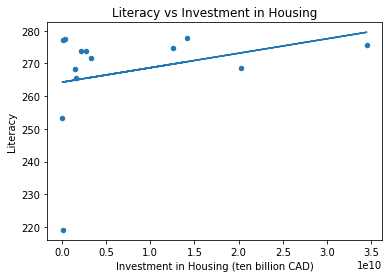

slope:  4.4305805588192543e-10
y intercept:  264.2594309503376
r value:  0.290112467536809
r squared value:  0.08416524382029607
p value:  0.3362922640988567
standard deviation error:  4.4066287394300364e-10
pearson correlation coefficient:  0.29


In [ ]:
df_2012.plot.scatter(x = "Investment", y = "Literacy", title = "Literacy vs Investment in Housing", xlabel = "Investment in Housing (ten billion CAD)")

x = df_2012["Investment"]
y = df_2012["Literacy"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.plot(x, mymodel)
plt.show()
print_stats(slope, intercept, r, p, std_err)
print("pearson correlation coefficient: ", 0.29)
#relatively stable - assumpition

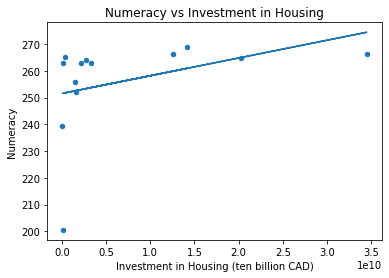

slope:  6.642763298227159e-10
y intercept:  251.52984308163298
r value:  0.3748827217020749
r squared value:  0.1405370550307553
p value:  0.20690596745356768
standard deviation error:  4.953025788547075e-10
pearson correlation coefficient:  0.37


In [ ]:
df_2012.plot.scatter(x = "Investment", y = "Numeracy", title = "Numeracy vs Investment in Housing", xlabel = "Investment in Housing (ten billion CAD)")
x = df_2012["Investment"]
y = df_2012["Numeracy"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.plot(x, mymodel)
plt.show()
print_stats(slope, intercept, r, p, std_err)
print("pearson correlation coefficient: ", 0.37)

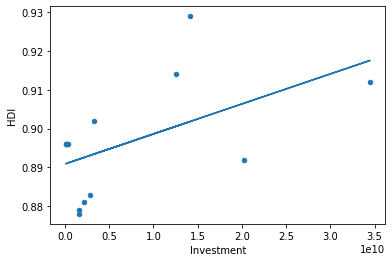

In [ ]:
#not prefered
df_2012.plot.scatter(x = "Investment", y = "HDI")
x = df_2012["Investment"]
y = df_2012["HDI"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.plot(x, mymodel)
plt.show()

###df_2010to2019

In [ ]:
df_2010to2019

,GEO,Investment,Year,HDI
1,Newfoundland and Labrador,1401706911,2010,0.874
2,Prince Edward Island,294382048,2010,0.894
3,Nova Scotia,2042692491,2010,0.878
4,New Brunswick,1519503296,2010,0.873
5,Quebec,19557782007,2010,0.886
...,...,...,...,...
135,Alberta,13692045256,2019,0.948
136,British Columbia,22269448251,2019,0.938
137,Yukon,166173179,2019,0.924
138,Northwest Territories,75815818,2019,0.924


In [ ]:
df_2010to2019[df_2010to2019["Year"] == 2012]

,GEO,Investment,Year,HDI
29,Newfoundland and Labrador,1576063062,2012,0.879
30,Prince Edward Island,329500361,2012,0.896
31,Nova Scotia,2192641120,2012,0.881
32,New Brunswick,1522456256,2012,0.878
33,Quebec,20260554451,2012,0.892
34,Ontario,34486680811,2012,0.912
35,Manitoba,2780945556,2012,0.883
36,Saskatchewan,3297171214,2012,0.902
37,Alberta,14140726827,2012,0.929
38,British Columbia,12583268454,2012,0.914


In [ ]:
df_2010to2019.corr() #make in

,Investment,Year,HDI
Investment,1.000000,0.083216,0.470422
Year,0.083216,1.000000,0.528539
HDI,0.470422,0.528539,1.000000


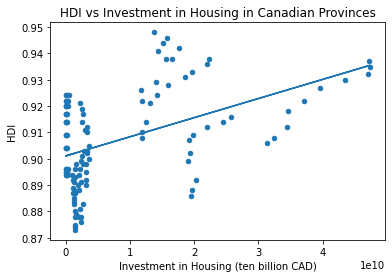

In [ ]:
df_2010to2019.plot.scatter(x = "Investment", y = "HDI", title = "HDI vs Investment in Housing in Canadian Provinces", xlabel = "Investment in Housing (ten billion CAD)")
x = df_2010to2019["Investment"]
y = df_2010to2019["HDI"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.plot(x, mymodel)
plt.show()

In [ ]:
#df_2010to2019.plot.scatter(x = "Year", y = "Investment")

In [ ]:
#df_2010to2019.plot.scatter(x = "Year", y = "HDI")

###df_canada

In [ ]:
df_canada

,GEO,Investment,Year,HDI
0,Canada,85144411351,2010,0.901
14,Canada,86716483933,2011,0.903
28,Canada,93503316539,2012,0.907
42,Canada,94561695194,2013,0.914
56,Canada,100195124313,2014,0.918
70,Canada,102936223465,2015,0.920
84,Canada,107551487366,2016,0.923
98,Canada,115873762763,2017,0.925
112,Canada,121381469208,2018,0.928
126,Canada,121142251848,2019,0.930


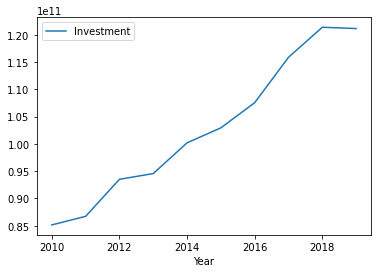

In [ ]:
df_canada.plot.line(x = "Year", y = "Investment")

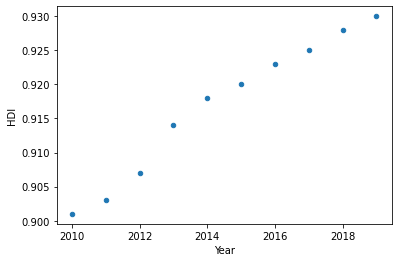

In [ ]:
df_canada.plot.scatter(x = "Year", y = "HDI") #line?

In [ ]:
df

,GEO,REF_DATE_x,Literacy,Numeracy,HDI,Year
0,Canada,2012,273.5,265.5,0.907,2012
1,Newfoundland and Labrador,2012,265.4,251.9,0.879,2012
2,Prince Edward Island,2012,277.5,265.0,0.896,2012
3,Nova Scotia,2012,273.9,262.8,0.881,2012
4,New Brunswick,2012,268.3,255.7,0.878,2012
5,Quebec,2012,268.6,264.9,0.892,2012
6,Ontario,2012,275.5,266.3,0.912,2012
7,Manitoba,2012,273.9,264.2,0.883,2012
8,Saskatchewan,2012,271.6,262.8,0.902,2012
9,Alberta,2012,277.7,269.1,0.929,2012


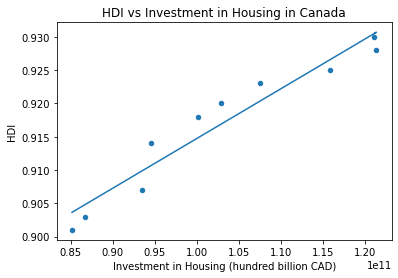

slope:  7.46410116964624e-13
y intercept:  0.8400939342508942
r value:  0.9651471423463367
r squared value:  0.9315090063792999
p value:  6.189434976618475e-06
standard deviation error:  7.155759371276194e-14
pearson correlation coefficient: 


In [ ]:
df_canada.plot.scatter(x = "Investment", y = "HDI", title = "HDI vs Investment in Housing in Canada", xlabel = "Investment in Housing (hundred billion CAD)")
x = df_canada["Investment"]
y = df_canada["HDI"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.plot(x, mymodel)
plt.show()
print_stats(slope, intercept, r, p, std_err)
print("pearson correlation coefficient: ", )

###df_canada_dec

In [ ]:
df_canada_dec

,GEO,REF_DATE,VALUE,Year,Year2
0,Canada,2010-01,7094532541,2010,2010.083333
1,Canada,2010-02,6085675314,2010,2010.166667
2,Canada,2010-03,5232280184,2010,2010.250000
3,Canada,2010-04,5719816158,2010,2010.333333
4,Canada,2010-05,7083345415,2010,2010.416667
...,...,...,...,...,...
148,Canada,2022-05,15292330755,2022,2022.416667
149,Canada,2022-06,16928637613,2022,2022.500000
150,Canada,2022-07,18423667636,2022,2022.583333
151,Canada,2022-08,18470232019,2022,2022.666667


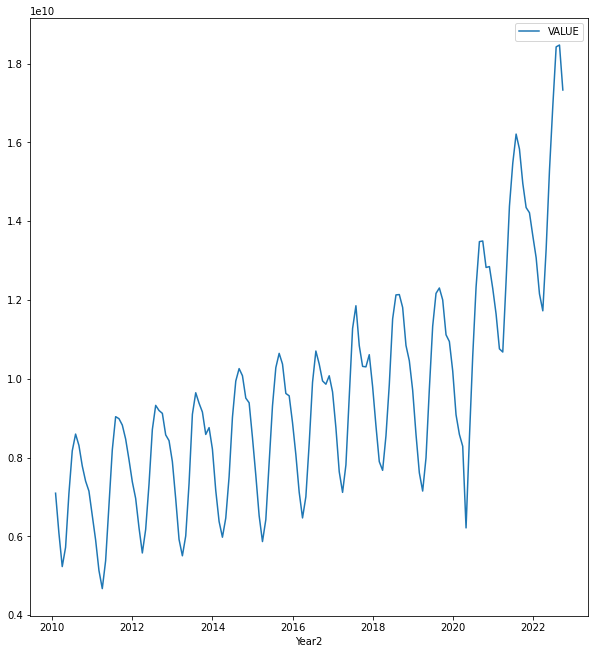

In [ ]:
df_canada_dec.plot.line(x = "Year2", y = "VALUE", figsize = (10, 11))